<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis Term I and II Project : IPL:"Hari Iyer March 2019 Cohort"

## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Observations](#section303)<br/>
    - 3.4 [Preprocessing](#section304)<br/>
    - 3.5 [Post Profiling](#section305)<br/>
4. [Questions](#section4)
    - 4.1 [Who are the top players of match ?](#section401)<br/>
    - 4.2 [Who are the top experienced batsmen?](#section402)<br/>
    - 4.3 [Who are the top experienced bowlers?](#section403)<br/>
    - 4.4 [Who are the top experienced fielders?](#section404)<br/>
    - 4.5 [Which team won the maximum number of matches?](#section405)<br/>
  
5. [Conclusion](#section5)<br/>  

<a id=section1></a>

<a id=section1></a>
### 1.Problem Statement

<a id=section101></a> 
### 1.1. Introduction



###                                                              Indian Premier League 
A professional T20 league, started in 2008 by BCCI that happens every Year in India, in the months of April and May.
A tournament that aims to promote Cricket in India and to provide a platform for the local players to play at a much higher level, to get the best possible environment for nurturing themselves into professionals and to provide enormous entertainment to the Cricket Fans in India and all over the world.. 
It's the most watched Cricket League in the world and, every season contributes about ₹5–10 bn to GDP of Indian Economy.

#### I want to create an Universal Premier League Cricket Cup for World Peace. The idea is to motivate world peace by creating teams across world . Each team will consist of members mixed from many different countries.
#### For this world cup , I want to select the 15 membered squad of  team IPL consisting of the best multinational players from each IPL teams who played IPL matches from 2007 till 2018.


<a id=section102></a>
### Data Source and Data Set

I have picked up my data from :

https://github.com/insaid2018/Term-1/blob/master/Data/Projects/matches.csv

https://github.com/insaid2018/Term-1/blob/master/Data/Projects/deliveries.csv

raw file path:

https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv

https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv



<a id=section2></a>
### 2.Data Loading and Description
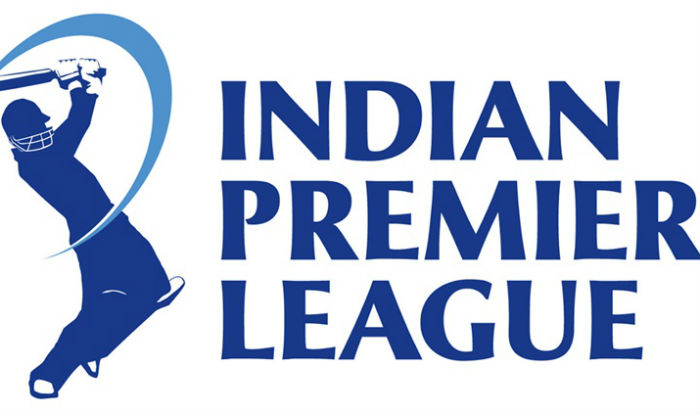

The dataset contains 2 files: deliveries.csv and matches.csv.

matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.
matches_data has 696 rows and 18 columns

deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

Below tables show names of all the columns and their respective description for matches and deliveries.


## matches table

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Id            | Match Identity                                            | 
| season     |When was it conducted                        |  
| city        | In which city was the match played                                          | 
| date          |On which date was the match played                                         |   
| team1          |Name of Team 1                                           |
| team2           |Name of Team 2                                           |
| toss_winner         |Who won the toss  |
| toss_decision         |What was the decision taken by Toss Winner |
| result       |Result type                                            |
| dl_applied          |Whether DL (Duckworth–Lewis method) was Applied                                           |
| winner         | Which team won the match                                             |
| win_by_runs           |By how many runs was the match won(If First batting team won)                                            | 
| win_by_wickets    |By how many wickets was the match won (If Second batting team won)                        |  
| player_of_match       |Who was the Player of the Match                                            | 
| venue          |Name of the stadium                                          |   
| umpire1          | Name of first Umpire                                           |
| umpire2           | Name of seconf Umpire                                           |
| umpire3         | Name of third umpire |


## deliveries table
       
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| match_id      |Match Identity                                        | 
| inning        |Innings Number                         |  
| batting_team        |Which team was batting                                            | 
| bowling_team         |Which team was bowling                                          |   
| over          |Over number                                          |
| ball          |Ball number                                          |
| batsman         |Which Batsman faced this delivery  |
| non_striker         |Which Batsman was at Non-Stiker end |
| bowler       |Who bowled this delivery                                             |
| is_super_over         |Whether this was Super Over                                            |
| wide_runs         |Wide runs consumed                                               |
| bye_runs   |bye runs consumed                                        | 
| legbye_runs     | legbye runs consumed                         |  
| noball_runs        |noball runs consumed                                           | 
| penalty_runs         |penalty runs consumed                                          |   
| batsman_runs           |Runs scored by batsman                                          |
| extra_runs           |extra runs consumed                                          |
| total_runs         |total runs consumed |
| player_dismissed         |Who got out |
| dismissal_kind        | How did the batsman got out                                            |
| fielder          | Who was the Fielder involved                                           |


#### Importing packages  

In [35]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', 100)

from subprocess import check_output
matches_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
deliveries_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [2]:
matches_data.shape


(696, 18)

matches_data has 696 rows and 18 columns.

In [3]:
deliveries_data.shape

(164750, 21)

deliveries_data has 164750 rows and 21 columns

In [4]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [8]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries_data.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
164745,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,5,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
164746,7953,2,Chennai Super Kings,Sunrisers Hyderabad,18,6,SR Watson,AT Rayudu,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164747,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,1,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164748,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,2,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
164749,7953,2,Chennai Super Kings,Sunrisers Hyderabad,19,3,AT Rayudu,SR Watson,CR Brathwaite,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [10]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [11]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [12]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [13]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [14]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that umpire3 column from the matches_data contains maximum null values. 

In [15]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

From the above output we can see that player_dismissed, dismissal_kind and fielder columns from the deliveries_data contain maximum null values.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [16]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_data_before_preprocessing.html")

In [17]:
profile = pandas_profiling.ProfileReport(deliveries_data)
profile.to_file(outputfile="deliveries_data_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html files as "matches_data_before_preprocessing.html" and "deliveries_data_before_preprocessing.html".  
 Now we will process our data to better understand it.

<a id=section303></a>
## Observations

   ## Observations from Pre Profiling Deliveries_data 
#### There are 5 Duplicate rows.
There are 21 columns. Let observe each column closely.

'match_id',
There are 696 distinct values. So, we can say 696 matches were played.


'inning',
Maximum of 4 innings were played in a match. (From domain knowledge , if a match has super over , it will have 4 innings as both teams have to bat and bowl twice.

'batting_team',
There are 14 distinct values. So, there are 14 teams.
Mumbai Indians have maximum match experience 


'bowling_team',
There are 14 distinct values. So, there are 14 teams.
Mumbai Indians have maximum match experience 


'over',
There are 20 distinct values. So, a maximum of 20 overs will be bowled in each innings. By Domain knowledge we know that IPL matches have 20:20 overs format. 
Super overs have 5:5 overs format.



'ball',
From Domain Knowledge we know that an over of 6 balls normally.No balls and wide balls will cost extra ball to the bowling team.
From the profile we see at maximum 3 extra balls have been bowled per over as we see 
a count of 113 9th ball.



'batsman',
Virat Kohli has maximum batting experience followed by Suresh Raina.


'non_striker',
From Profile Suresh Raina has maximum Non-Striker experience. From domain knowledge 
Maximum non-striking experience hints that Raina has maximum experience in playing the role of a partner. But this does not imply that he has best partnering performance.


'bowler',
Harbhajan Singh has maximum bowling experience followed by A Mishra.

'is_super_over',
 There were 81 balls bowled during Super Overs.


'wide_runs',
 97% of deliveries consumed 0 wide runs. So,3% deliveries were wide balls.

'bye_runs',
 0.3% of total runs scored were bye_runs.


'legbye_runs',
 1.7% of total runs scored were Legbye_runs

'noball_runs',
   0.4% of total runs scored were noball_runs

'penalty_runs',
 10 runs were consumed as penalty runs by two counts of 5run penalty.

'batsman_runs',
 There were 18707 Fours and 7392 sixers hit against Non-no balls.


'extra_runs',
5.4% of total runs were extras.

#### 'total_runs',Total runs are highly co-related with batsman runs.It should not be considered for Analysis.


'player_dismissed',
This data object has 95% missing values. But from domain knowledge, we know that it is expected behavior.


'dismissal_kind',
This data object has 95% missing values. But from domain knowledge, we know that it is expected behavior. Maximum count of Dismissals were on account of catch taken.
If we want to calculate the percentage of caught dismissals against total dismissals, we need to treat those 95% missing values.


'fielder'
This data object has 96.4% missing values. But from domain knowledge, we know that it is expected behavior because this field comes into consideration only for those deliveries in which a dismissal was made. 
KD Karthik has maximum fielder count of this object followed by MS Dhoni.


## Observations from Pre Profiling matches_data 

There are 18 columns. Let observe each column closely.
'id', 
There are 696 distinct values. So, we can say 696 matches were played.

'season', 
There are 11 distinct values.  Each year from 2008 to 2018 is a season.

'city',
This is categorical data. This variable has 1% missing values.
From the problem statement perspective this column is not so important. 

'date',
This has high cardinality
 
'team1' and 'team2', 
 There are categorical with 14 distinct count.

'toss_winner',
 This has 14 distinct values. These values are picked from Team 1 or Team 2. 

'toss_decision',
  This has 2 distinct values.

 'result',
  This has three distinct values.

 'dl_applied', 
 Boolean type variable.

'winner',
 Categorical data with 15 distinct values.
 
'win_by_runs',
Numeric

'win_by_wickets',
Numeric
 
'player_of_match',
 Categorical with 215 distinct values

 'venue',
Categorical with 35 distinct values

 'umpire1',
Categorical with 56 distinct values

 'umpire2',
Categorical with 59 distinct values

#### 'umpire3',Categorical with 215 distinct values.This column has 91.4% missing values. 
      


<a id=section304></a>
### Preprocessing

###### Dealing with missing values of matches_data<br/>
- Dropping the column __'umpire3'__ as it has too many _null_ values.
    

In [18]:
matches_data.drop('umpire3', axis = 1,inplace = True)

In [19]:
matches_data.shape

(696, 17)

##### After dropping umpire , we can can now see that the matches.shape has only 17 columns as opposed 18 before dropping

In [20]:
matches_data.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

##### Dealing with Duplicate rows of deliveries_data

Lets have a look at the duplicated rows which were reported by Pandas profiling

In [21]:
deliveries_data.loc[deliveries_data.duplicated(keep=False),:]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162803,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162804,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162863,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162963,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


From above result we see 5 rows were repeated . So we should delete those duplicate rows.

In [22]:
deliveries_data.shape

(164750, 21)

In [23]:
deliveries_data=deliveries_data.drop_duplicates()



In [24]:
deliveries_data.shape

(164745, 21)

Since those duplicate rows were dropped the number of rows got reduced to 164745.

In [25]:
deliveries_data[deliveries_data.total_runs > deliveries_data.batsman_runs].shape

(8878, 21)

##### Dealing with  Panda profiling rejected column of deliveries_data
As per profiling , total_runs is highly co-related with batsman_run and should be rejected.
But by domain knowledge , we know that extras like wide-runs , noball_runs are the factors that differentiate batsman_runs and total_runs.Practically no bowler will consume extras in every ball. So, high co-relation between batsman_runs and total_runs is expected.Hence we can ignore Panda's suggestion to reject this .

<a id=section305></a>
### Post Profiling

In [26]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_data_after_preprocessing.html")

In [27]:
profile = pandas_profiling.ProfileReport(deliveries_data)
profile.to_file(outputfile="deliveries_data_after_preprocessing.html")

Now we have dropped the duplicate rows in deliveries_data and dropped umpire3. We ignored certain pre profiling recommendations because we know that they are expected behavior by domain knowledge.

<a id=section4></a>
### 4. Questions

<a id=section401></a>
### 4.1 Who are the top players of match ?

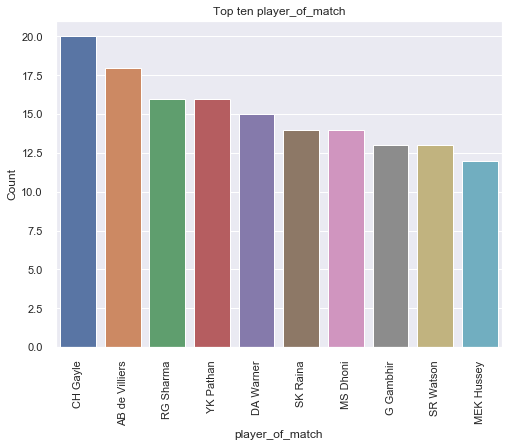

In [57]:
from collections import Counter
player_of_match_count = Counter(matches_data['player_of_match'].dropna().tolist()).most_common(10)
player_of_match_idx = [player_of_match[0] for player_of_match in player_of_match_count]
player_of_match_val = [player_of_match[1] for player_of_match in player_of_match_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = player_of_match_idx,y=player_of_match_val ,ax =ax)
plt.title('Top ten player_of_match')
plt.xlabel('player_of_match')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

So, CH Gayle earned the title of "Player of Match" maximum times.
Second position is held by AB de Villiers 
Third position is shared by RG Sharma and YK Pathan.

So,for shortlisting the team of 15 member squad , lets add CH Gayle, AB Devillers, RG Sharma and YK Pathan

In [58]:
selected_players = {'CH Gayle', 'AB de Villiers', 'RG Sharma', 'YK Pathan'}
print (selected_players)

{'AB de Villiers', 'YK Pathan', 'RG Sharma', 'CH Gayle'}


<a id=section402></a>
### 4.2 Who are the top experienced batsmen?

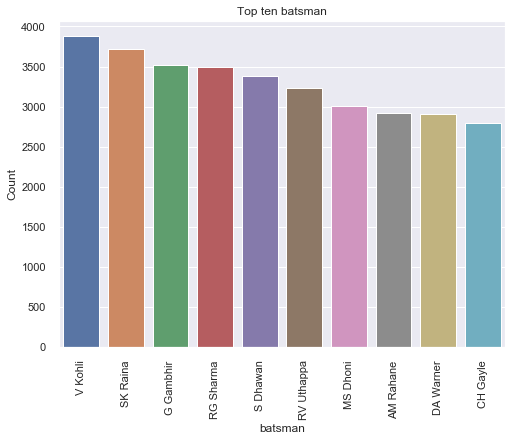

In [37]:
from collections import Counter
batsman_count = Counter(deliveries_data['batsman'].dropna().tolist()).most_common(10)
batsman_idx = [batsman[0] for batsman in batsman_count]
batsman_val = [batsman[1] for batsman in batsman_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = batsman_idx,y=batsman_val ,ax =ax)
plt.title('Top ten batsman')
plt.xlabel('batsman')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

So , for shortlisting the team of 15 member squad , lets add V Kohli, SK Raina, GGambhir and RG Sharma. But, note that RG Sharma is alreday selected while considering top "Players of Match"

In [59]:
selected_players.update(['V Kohli','SK Raina','GGambhir','RG Sharma'])
print(selected_players)

{'AB de Villiers', 'V Kohli', 'CH Gayle', 'SK Raina', 'YK Pathan', 'GGambhir', 'RG Sharma'}


<a id=section403></a>
### 4.3 Who are the top experienced bowlers?

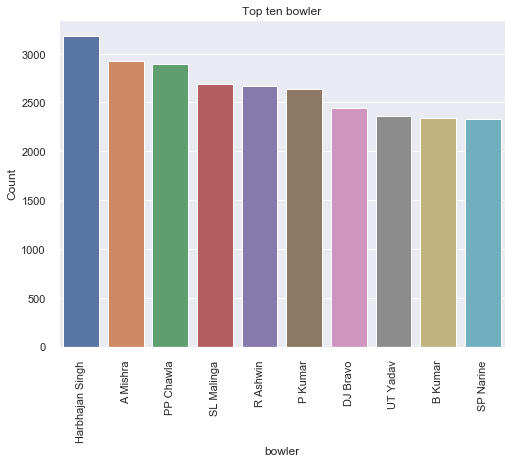

In [55]:
from collections import Counter
bowler_count = Counter(deliveries_data['bowler'].dropna().tolist()).most_common(10)
bowler_idx = [bowler[0] for bowler in bowler_count]
bowler_val = [bowler[1] for bowler in bowler_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = bowler_idx,y=bowler_val ,ax =ax)
plt.title('Top ten bowler')
plt.xlabel('bowler')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

So , for shortlisting the team of 15 member squad , lets add Harbhajan Singh, A Mishra, PP Chawla , SL Malinga and R Ashwin. 

In [66]:
selected_players.update(['Harbhajan Singh','A Mishra','PP Chawla','SL Malinga', 'R Ashwin'])
print(selected_players)

{'AB de Villiers', 'A Mishra', 'SL Malinga', 'KD Karthik', 'V Kohli', 'MS Dhoni', 'CH Gayle', 'RV Uthappa', 'R Ashwin', 'SK Raina', 'YK Pathan', 'GGambhir', 'RG Sharma', 'Harbhajan Singh', 'PP Chawla'}


<a id=section404></a>
### 4.4 Who are the top experienced fielders?

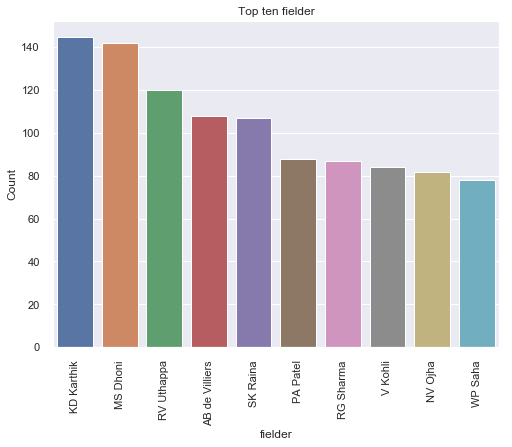

In [61]:
from collections import Counter
fielder_count = Counter(deliveries_data['fielder'].dropna().tolist()).most_common(10)
fielder_idx = [fielder[0] for fielder in fielder_count]
fielder_val = [fielder[1] for fielder in fielder_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = fielder_idx,y=fielder_val ,ax =ax)
plt.title('Top ten fielder')
plt.xlabel('fielder')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

So , for shortlisting the team of 15 member squad , lets add KD Karthik, MS Dhoni, RV Uthappa and AB de Villiers.
Note that AB de Villiers is already selected.So, we are automatically adding top performers with multiple skills.

From domain knowledge , we know that KD Karthik, MS Dhoni,and AB de Villiers are excellent wicketkeepers.
For building a string International team, we should try to select more wicket keepers because they can do excellent fielding b virtue of their wicket keeping experience.

In [67]:
selected_players.update(['KD Karthik','MS Dhoni','RV Uthappa' ,'AB de Villiers'])
print(selected_players)

{'AB de Villiers', 'A Mishra', 'SL Malinga', 'KD Karthik', 'V Kohli', 'MS Dhoni', 'CH Gayle', 'RV Uthappa', 'R Ashwin', 'SK Raina', 'YK Pathan', 'GGambhir', 'RG Sharma', 'Harbhajan Singh', 'PP Chawla'}


<a id=section405></a>
### 4.5 Which team won the maximum number of matches?

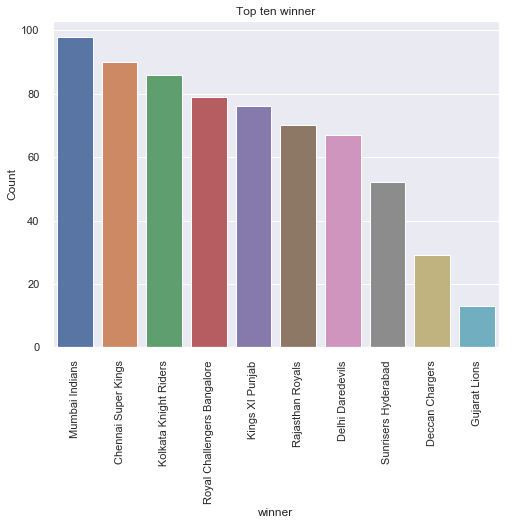

In [64]:
from collections import Counter
winner_count = Counter(matches_data['winner'].dropna().tolist()).most_common(10)
winner_idx = [winner[0] for winner in winner_count]
winner_val = [winner[1] for winner in winner_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = winner_idx,y=winner_val ,ax =ax)
plt.title('Top ten winner')
plt.xlabel('winner')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

So ,Mumbai Indians tops the list of winning teams, followed by MS Dhoni .By Domain knowledge , we know that 'RG Sharma' is the captain of Mumbai Indians and 'MS Dhoni' is the captain of Chennai Super Kings.Notice that both of them are already members of 'selected_players'
So, Lets Selected them as captain and vice captain respectively.,


<a id=section5></a>
### Conclusion

•With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.

•Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.

•We have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.

•We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.

•We have seen the impact of columns like player_of_match,batsman,bowler,fielder for the team selection.

•The most important inference drawn from all this analysis is, we get to know who are the most experienced and performing players. 

•We have also seen that domain knowledge is equally important as exploratory data analysis.

•This analysis will help us to choose which machine learning model we can apply to select top performing players to select world class team. 
 
#### The 15 member Squad of team IPL we selected are:
##### 'AB de Villiers', 'A Mishra', 'SL Malinga', 'KD Karthik', 'V Kohli', 'MS Dhoni', 'CH Gayle', 'RV Uthappa', 'R Ashwin', 'SK Raina', 'YK Pathan', 'GGambhir', 'RG Sharma', 'Harbhajan Singh' and 'PP Chawla'.
 
#### 'RG Sharma' has been selected as captain and 'MS Dhoni' has been selected as Vice captain.


## Wishing "All the best" to team IPL for the Universal Premier League Cricket Cup for World Peace.